a반 202242020 민경은

# 영양 섭취 및 생활습관에 따른 비만데이터 **분석**

기본정보 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/Obesity.csv'
df = pd.read_csv(file_path)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [10]:
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


분석 및 시각화

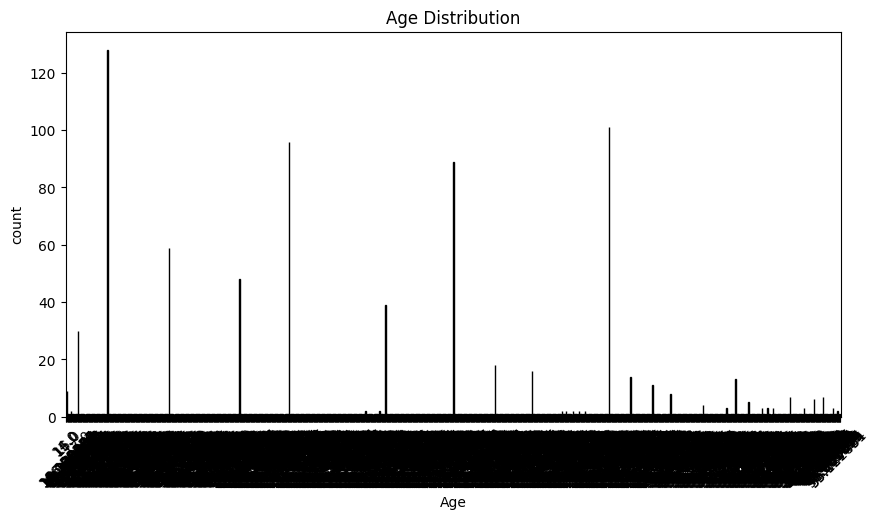

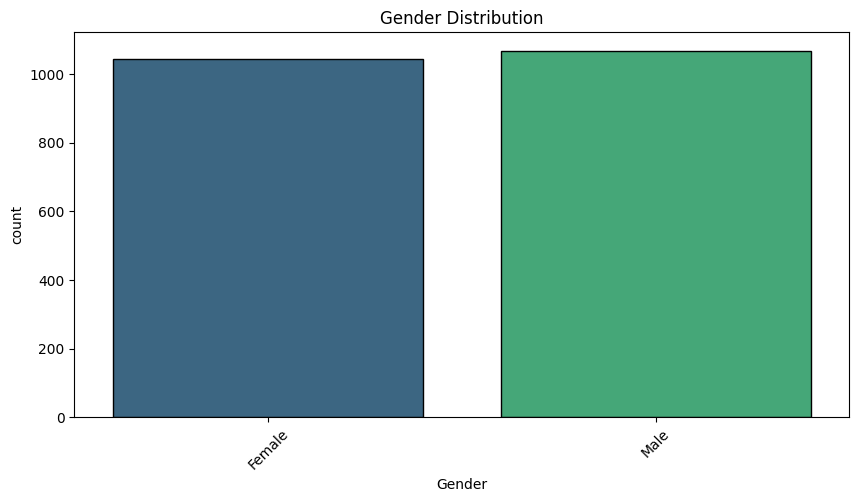

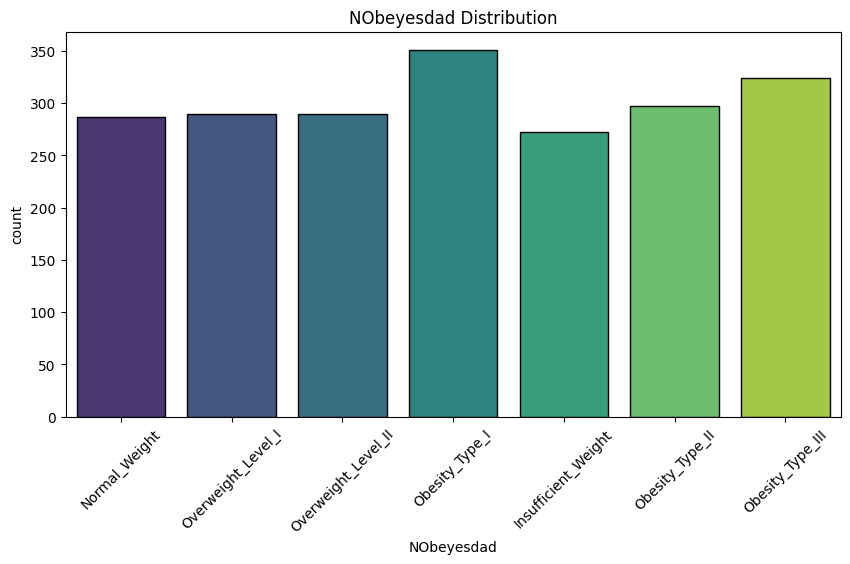

In [29]:
# Age, Gender, and NObeyesdad (비만 수준)에 대해 시각화
plot_distribution('Age')
plot_distribution('Gender')
plot_distribution('NObeyesdad')

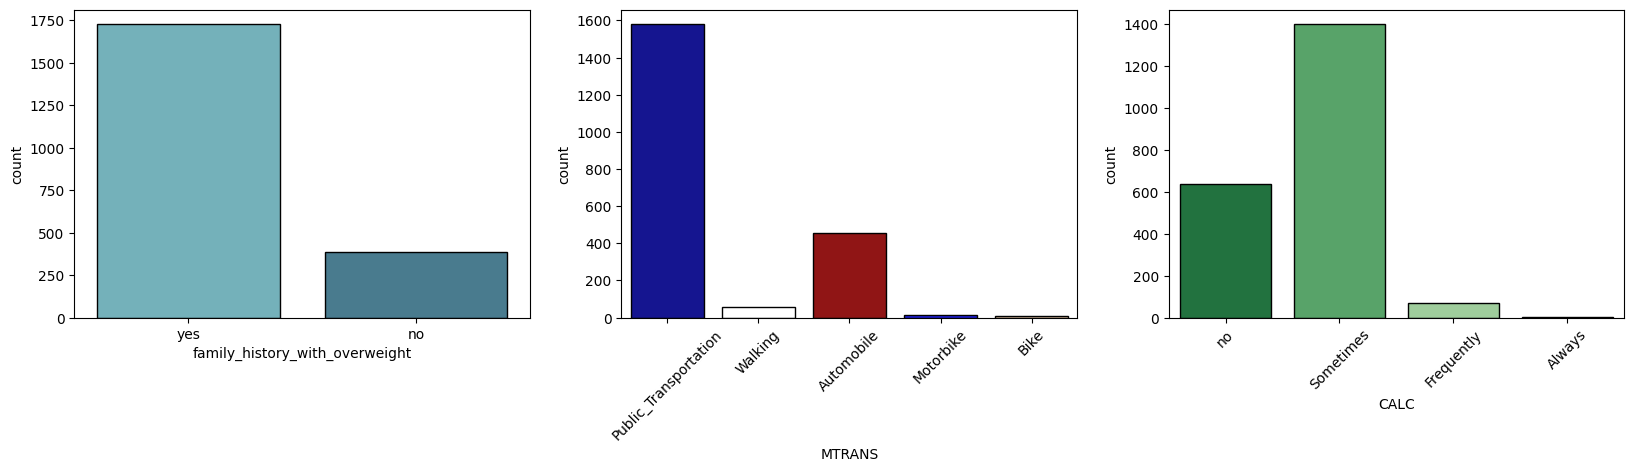

In [33]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df, palette="flag",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="Greens_r",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

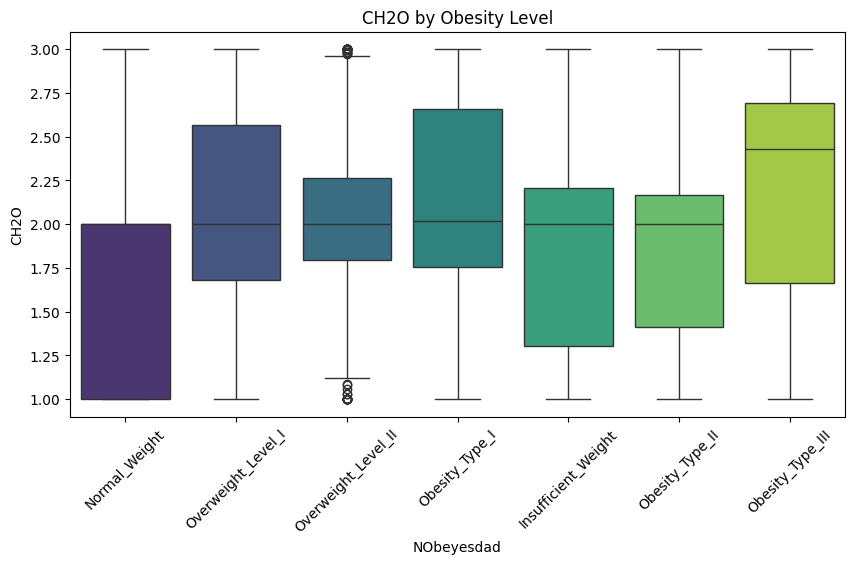

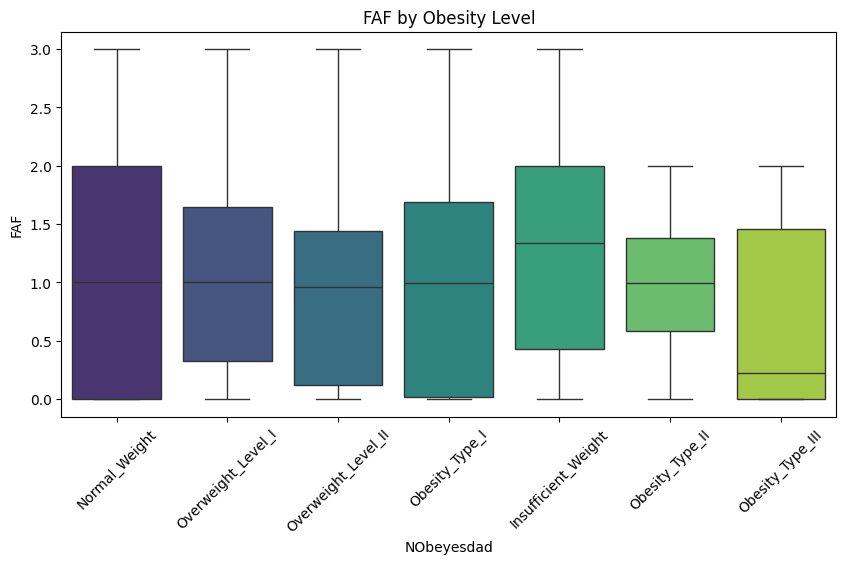

In [36]:
#  비만 수준에 따른 생활습관 특성 비교
def plot_box(column_name):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")
    plt.title(f'{column_name} by Obesity Level')
    plt.xticks(rotation=45)
    plt.show()

# 물 섭취량 (CH2O), 활동량 (FAF) 등과 비만 수준 간의 관계 시각화
plot_box('CH2O')
plot_box('FAF')

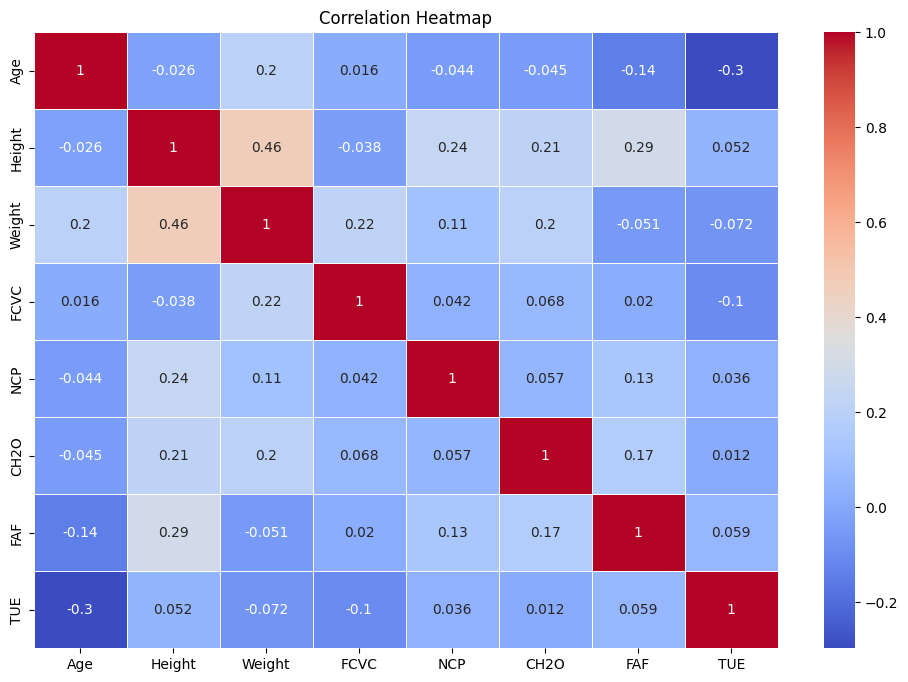

In [37]:
#  비만 관련 주요 특성에 대한 상관관계 히트맵
plt.figure(figsize=(12, 8))
corr = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-6-39dd3fcfe9cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")


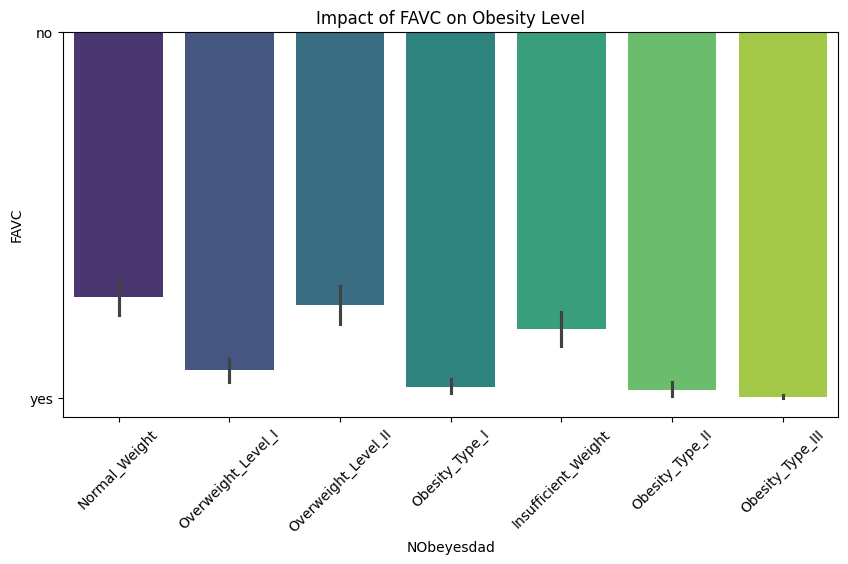

<ipython-input-6-39dd3fcfe9cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")


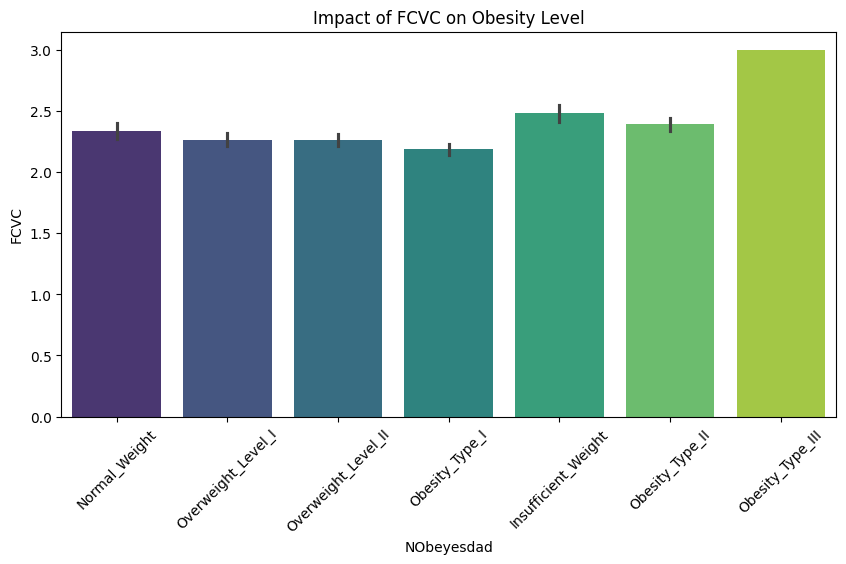

In [6]:
def plot_bar(column_name):
    plt.figure(figsize=(10, 5))
    sns.barplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")
    plt.title(f'Impact of {column_name} on Obesity Level')
    plt.xticks(rotation=45)
    plt.show()

# 고칼로리 음식 섭취 빈도 (FAVC), 야채 섭취 빈도 (FCVC)
plot_bar('FAVC')
plot_bar('FCVC')


<ipython-input-20-35b3c351b891>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")


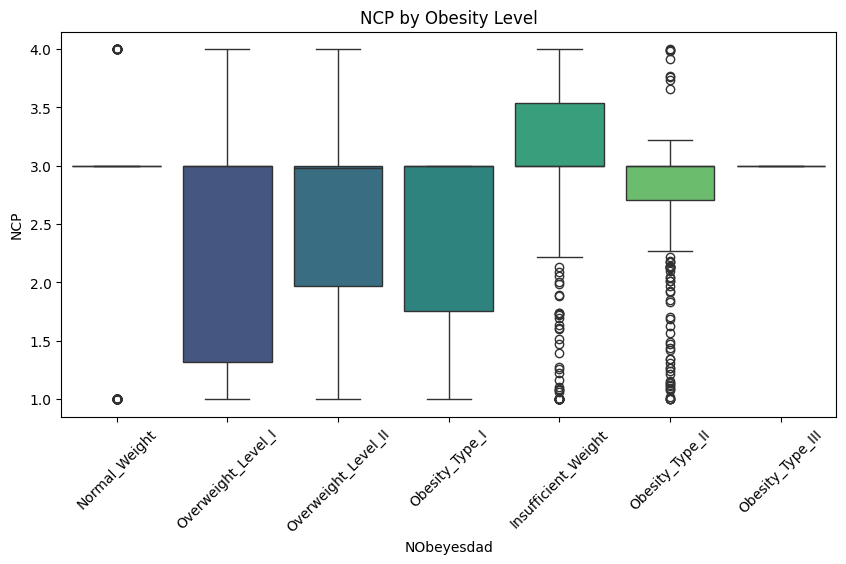

<ipython-input-20-35b3c351b891>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")


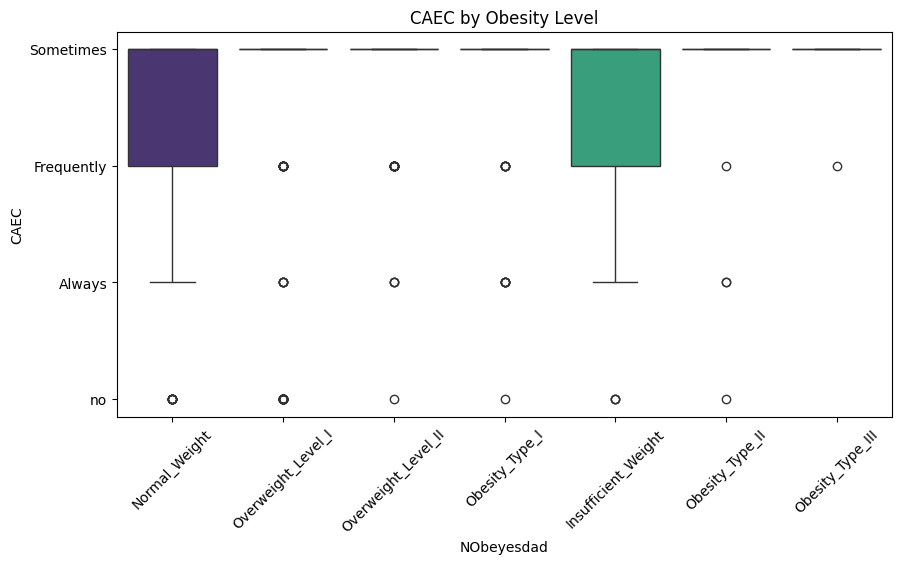

<ipython-input-20-35b3c351b891>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")


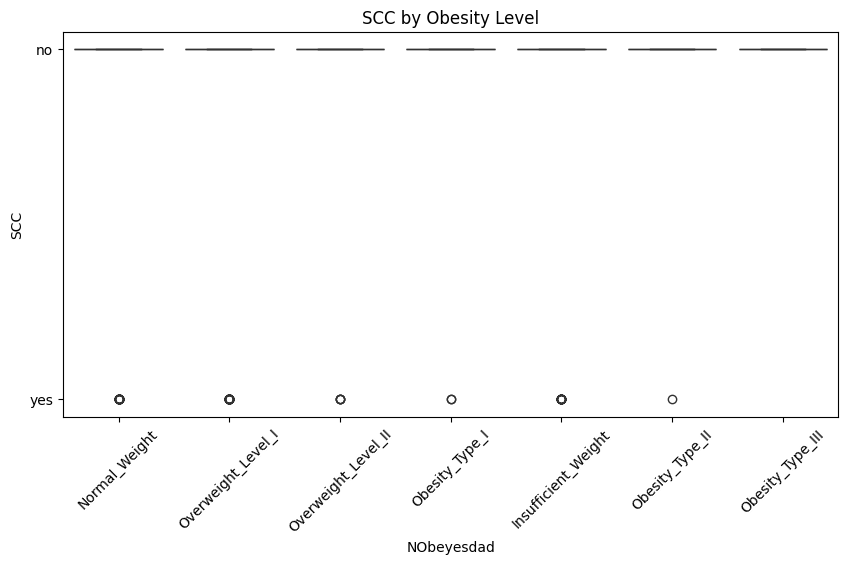

<ipython-input-20-35b3c351b891>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")


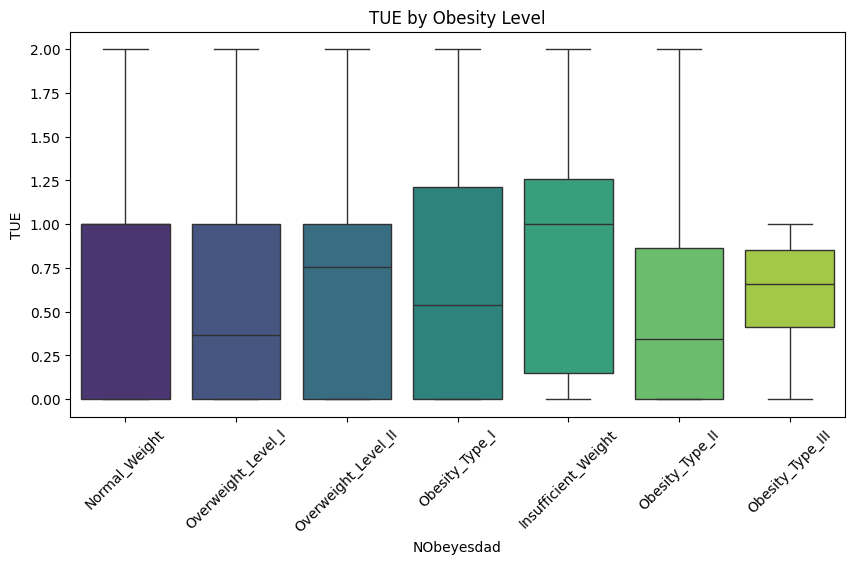

In [20]:
def plot_box(column_name):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='NObeyesdad', y=column_name, data=df, palette="viridis")
    plt.title(f'{column_name} by Obesity Level')
    plt.xticks(rotation=45)
    plt.show()


# 주요 식사 횟수 (NCP), 간식 섭취 빈도 (CAEC)와 비만 수준 간의 관계 시각화
plot_box('NCP')
plot_box('CAEC')

# 칼로리 소비 모니터링 여부 (SCC), 기술 장치 사용 시간 (TUE)와 비만 수준 간의 관계 시각화
plot_box('SCC')
plot_box('TUE')